<a id='section11'></a>
# Index
1. [***Check Python package versions***](#section1)  
2. [***Import a text file of data using Python***](#section2) 
3. [***Load the "rpy2" package to run R commands in a Python notebook and check R packages***](#section3)   
4. [***Transfer the data from Python to R***](#section4)
5. [***Another way is to load the text file directly into R***](#section5)
6. [***Convert the data from wide to long so that the repeated measures factor will load properly for analysis***](#section6)
7. [***Use the R "plyr" package to view descriptive statistics***](#section7)
8. [***Use the R "ez" package to complete an ANOVA***](#section8)
9. [***Use the R "ggplot2" package to plot the data***](#section9)
10. [***Save the notebook***](#section10)

----------------   

----------------    

<a id='section1'></a>
## ***(1) Check Python package versions***
##### [back to top](#section11)

In [1]:
# Which version of Python is installed?
import sys
print(sys.version)

2.7.11 |Anaconda 2.5.0 (64-bit)| (default, Dec  6 2015, 18:08:32) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [2]:
# Which Python package versions are installed?
import pip
all_packages = pip.get_installed_distributions()
used_packages = ['pandas', 'rpy2', 'pip']

for entry in used_packages:
    for p in all_packages:
        if entry in str(p):
            print(str(p))

pandas 0.17.1
rpy2 2.7.8
pip 8.1.1


<a id='section2'></a>
## ***(2) Import a text file of data using Python***
##### [back to top](#section11)

In [3]:
# import the Python module
import pandas as pd

# import CSV File containing heart rate variability in shrews at 3 times points (EKG0, EKG1, EKG2; within-subjects)
# and under five conditions (0, 0.3, 1, 5, and 10; between-subjects)
Text_in_Python = pd.read_csv('DATA_FILES/Test.csv')
# let's only display the first 3 rows
Text_in_Python.head(3)

,Animal,Cond,EKG0,EKG1,EKG2
0,1,0,0.001582,0.001250,0.004771
1,2,0,0.002241,0.000957,0.002176
2,3,0,0.003509,0.002070,0.003817


<a id='section3'></a>
## ***(3) Load the "rpy2" package to run R commands in a Python notebook and check R packages***
##### [back to top](#section11)

In [4]:
%load_ext rpy2.ipython

In [5]:
%%R
# Which version of R is installed?
R.version.string

[1] "R version 3.2.2 (2015-08-14)"


In [6]:
%%R
# Which R packages are installed?
packages <- c("reshape2", "ez", "plyr", "ggplot2")
sapply(packages, packageDescription, fields = "Version")

reshape2       ez     plyr  ggplot2 
 "1.4.1"    "4.3"  "1.8.3"  "1.0.1" 


<a id='section4'></a>
## ***(4) Transfer the data from Python to R***
##### [back to top](#section11)

In [7]:
%%R -i Text_in_Python
# load dataframe into R
Text_in_Python

   Animal Cond         EKG0         EKG1         EKG2
0       1  0.0 0.0015820377 0.0012501746 4.771493e-03
1       2  0.0 0.0022409076 0.0009570781 2.175935e-03
2       3  0.0 0.0035091349 0.0020700662 3.817422e-03
3       4  0.0 0.0025342004 0.0026723599 4.091167e-03
4       5  0.3 0.0037336118 0.0197033480 4.988560e-03
5       6  0.3 0.0035002617 0.0035102697 2.919219e-03
6       7  0.3 0.0016033409 0.0027758780 1.818235e-03
7       8  0.3 0.0009185860 0.0029250079 3.184348e-03
8       9  1.0 0.0023883633 0.0007612123 1.646750e-04
9      10  1.0 0.0013197145 0.0009709432 2.496306e-05
10     11  1.0 0.0016207909 0.0010893986 3.707651e-04
11     12  1.0 0.0035831894 0.0013318623 6.306695e-04
12     13  5.0 0.0010597949 0.0010441496 7.821470e-06
13     14  5.0 0.0009959162 0.0006349528 8.101859e-04
14     15  5.0 0.0012551011 0.0010957923 2.110545e-04
15     16  5.0 0.0013267764 0.0012108684 3.850106e-04
16     17 10.0 0.0017170664 0.0101745064 3.385297e-03
17     18 10.0 0.0029291846 

<a id='section5'></a>
## ***(5) Another way is to load the text file directly into R***
##### [back to top](#section11)

In [8]:
%%R
#Load raw data into R
Text_import = read.csv("DATA_FILES/Test.csv")
Text_import

   Animal Cond         EKG0         EKG1         EKG2
1       1  0.0 0.0015820377 0.0012501746 4.771493e-03
2       2  0.0 0.0022409076 0.0009570781 2.175935e-03
3       3  0.0 0.0035091349 0.0020700662 3.817422e-03
4       4  0.0 0.0025342004 0.0026723599 4.091167e-03
5       5  0.3 0.0037336118 0.0197033480 4.988560e-03
6       6  0.3 0.0035002617 0.0035102697 2.919219e-03
7       7  0.3 0.0016033409 0.0027758780 1.818235e-03
8       8  0.3 0.0009185860 0.0029250079 3.184348e-03
9       9  1.0 0.0023883633 0.0007612123 1.646750e-04
10     10  1.0 0.0013197145 0.0009709432 2.496306e-05
11     11  1.0 0.0016207909 0.0010893986 3.707651e-04
12     12  1.0 0.0035831894 0.0013318623 6.306695e-04
13     13  5.0 0.0010597949 0.0010441496 7.821470e-06
14     14  5.0 0.0009959162 0.0006349528 8.101859e-04
15     15  5.0 0.0012551011 0.0010957923 2.110545e-04
16     16  5.0 0.0013267764 0.0012108684 3.850106e-04
17     17 10.0 0.0017170664 0.0101745064 3.385297e-03
18     18 10.0 0.0029291846 

<a id='section6'></a>
## ***(6) Convert the data from wide to long so that the repeated measures factor will load properly for analysis***
##### [back to top](#section11)

In [9]:
%%R
# load the reshape2 package to convert from wide to long
library(reshape2)
Long = melt(Text_import, id.vars=c("Animal","Cond"), variable.name="Time")
# relabel the factor names
Long$Cond[Long$Cond == '0'] = '0 ms'
Long$Cond[Long$Cond == '0.3'] = '0.3 ms'
Long$Cond[Long$Cond == '1'] = '1 ms'
Long$Cond[Long$Cond == '5'] = '5 ms'
Long$Cond[Long$Cond == '10'] = '10 ms'
Long

   Animal   Cond Time        value
1       1   0 ms EKG0 1.582038e-03
2       2   0 ms EKG0 2.240908e-03
3       3   0 ms EKG0 3.509135e-03
4       4   0 ms EKG0 2.534200e-03
5       5 0.3 ms EKG0 3.733612e-03
6       6 0.3 ms EKG0 3.500262e-03
7       7 0.3 ms EKG0 1.603341e-03
8       8 0.3 ms EKG0 9.185860e-04
9       9   1 ms EKG0 2.388363e-03
10     10   1 ms EKG0 1.319714e-03
11     11   1 ms EKG0 1.620791e-03
12     12   1 ms EKG0 3.583189e-03
13     13   5 ms EKG0 1.059795e-03
14     14   5 ms EKG0 9.959162e-04
15     15   5 ms EKG0 1.255101e-03
16     16   5 ms EKG0 1.326776e-03
17     17  10 ms EKG0 1.717066e-03
18     18  10 ms EKG0 2.929185e-03
19     19  10 ms EKG0 9.746104e-04
20     20  10 ms EKG0 7.552507e-04
21      1   0 ms EKG1 1.250175e-03
22      2   0 ms EKG1 9.570781e-04
23      3   0 ms EKG1 2.070066e-03
24      4   0 ms EKG1 2.672360e-03
25      5 0.3 ms EKG1 1.970335e-02
26      6 0.3 ms EKG1 3.510270e-03
27      7 0.3 ms EKG1 2.775878e-03
28      8 0.3 ms EKG

<a id='section7'></a>
## ***(7) Use the R "plyr" package to view descriptive statistics***
##### [back to top](#section11)

In [10]:
%%R
# load the plyr package
library(plyr)
# set the number of digits to two
options(digits=2)
# create a table 
# showing the mean, standard deviation, and standard error of the mean for each group
means = ddply(Long, .(Cond,Time), colwise(mean, .(value)))
# compute the standard deviation
SD = ddply(Long, .(Cond,Time), colwise(sd, .(value)))
means$SD = SD$value
# add a new column to the dataframe with the standard error of the mean
means$sem = SD$value/sqrt(4)
# Rename the column to "mean"
colnames(means)[colnames(means)=="value"] = "mean"
# print
means

     Cond Time    mean      SD     sem
1  0.3 ms EKG0 0.00244 0.00139 7.0e-04
2  0.3 ms EKG1 0.00723 0.00832 4.2e-03
3  0.3 ms EKG2 0.00323 0.00131 6.6e-04
4    0 ms EKG0 0.00247 0.00080 4.0e-04
5    0 ms EKG1 0.00174 0.00078 3.9e-04
6    0 ms EKG2 0.00371 0.00110 5.5e-04
7   10 ms EKG0 0.00159 0.00098 4.9e-04
8   10 ms EKG1 0.00319 0.00471 2.4e-03
9   10 ms EKG2 0.00160 0.00122 6.1e-04
10   1 ms EKG0 0.00223 0.00101 5.0e-04
11   1 ms EKG1 0.00104 0.00024 1.2e-04
12   1 ms EKG2 0.00030 0.00026 1.3e-04
13   5 ms EKG0 0.00116 0.00016 7.8e-05
14   5 ms EKG1 0.00100 0.00025 1.3e-04
15   5 ms EKG2 0.00035 0.00034 1.7e-04


<a id='section8'></a>
## ***(8) Use the R "ez" package to complete an ANOVA***
##### [back to top](#section11)

In [11]:
%%R
# load the ez package
library(ez)
# set the variables "Cond", "Time", and "Animal" (subjects) as Factors
Long$Cond = as.factor(Long$Cond)
Long$Time = as.factor(Long$Time)
Long$Animal = as.factor(Long$Animal)
# set the variable "value" as the dependent measure
Long$value = as.numeric(Long$value)
# run ANOVA
ezANOVA(data=Long, dv=value, wid=Animal, between=Cond, within=Time)

$ANOVA
     Effect DFn DFd   F    p p<.05   ges
2      Cond   4  15 2.2 0.11       0.228
3      Time   2  30 1.1 0.33       0.037
4 Cond:Time   8  30 1.6 0.17       0.176

$`Mauchly's Test for Sphericity`
     Effect    W       p p<.05
3      Time 0.21 1.6e-05     *
4 Cond:Time 0.21 1.6e-05     *

$`Sphericity Corrections`
     Effect  GGe p[GG] p[GG]<.05  HFe p[HF] p[HF]<.05
3      Time 0.56  0.31           0.57  0.31          
4 Cond:Time 0.56  0.22           0.57  0.22          



<a id='section9'></a>
## ***(9) Use the R "ggplot2" package to plot the data***
##### [back to top](#section11)

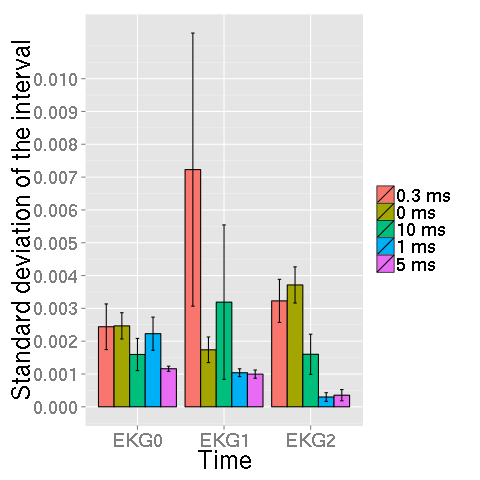

In [12]:
%%R
# load the package
library(ggplot2)
# adjust the position of the bars
dodge = position_dodge(width=0.9)
# create the plot
ggplot(means, aes(color, fill=Cond, y=mean, x=Time))+ 
    geom_bar(stat='identity', color='black',position='dodge') + 
    theme(axis.text.x = element_text(angle = 0), text = element_text(size = 25)) +
    labs(x = "Time", y = "Standard deviation of the interval", fill= "") +
    geom_errorbar(position=dodge, aes(ymin=mean-sem,ymax=mean+sem), width=.2) +
    scale_y_continuous(breaks=seq(0, 0.01, 0.001))

<a id='section10'></a>
## ***(10) Save the notebook***
##### [back to top](#section11)

In [13]:
# grabbing the name of the current notebook and printing the name
# if the print statement does not work, rerun the code for the following 3 cells

In [14]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NotebookName = '" + IPython.notebook.notebook_name + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [15]:
print(NotebookName)

R_Statistics.ipynb


In [16]:
## Saving the notebook to html and moving to directory
import os
import subprocess
subprocess.call('jupyter nbconvert '+NotebookName,shell=True)

0